# N-gram language modeling
Let's train an n-gram language model.

## Setup
No need to run this unless you haven't successfully installed `nltk` or `scikit-learn` yet.

In [ ]:
! pip install --user nltk
! pip install --user scikit-learn

Now select **Kernel > Restart Kernel** from the menu bar.

In [ ]:
# Test importing
import nltk
import sklearn

## Load news text from Reuters
Reuters from the '90s. Old news.

In [ ]:
# Only need to run this once on your CRCD account
import nltk
nltk.download('reuters')

In [ ]:
import nltk
from nltk.corpus import reuters

In [ ]:
sents = reuters.sents() # Load all sentences in the corpus and lowercase
sents

# Preprocess the text into ngrams

In [ ]:
# Lowercase the data
sents = [[word.lower() for word in doc] for doc in sents]
sents[:1]

In [ ]:
# Randomly split into training and test
from sklearn.model_selection import train_test_split

random_seed = # FILL IN an integer
train, test = train_test_split(sents, test_size=0.1, random_state=random_seed)
print(len(train))
print(len(test))

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline

n = 2 # what order of ngram
processed_train, vocab = padded_everygram_pipeline(n, train) 
# unfortunately can't inspect this as its a generator that's evaluated ("filled in") lazily

# Train an ngram language model

In [ ]:
from nltk.lm import MLE

# Initiate and fit an ngram language model
lm = MLE(n)
lm.fit(processed_train, vocab)

In [ ]:
# FILL IN a random word to check its counts
example_word =
lm.counts[example_word]

In [ ]:
# FILL IN an example bigram
bigram_first_word = 
bigram_second_word =

lm.counts[[bigram_first_word]][bigram_second_word]

In [ ]:
# Check out the calculated probabilities for unigrams and bigrams ("scores")
# These are the weights/parameters of the model, estimated from data

print(lm.score(example_word))
print(lm.score(bigram_second_word, [bigram_first_word]))

In [ ]:
# Check out the log probabilities, which are used in practice. Why are they always negative?

lm.logscore(example_word)

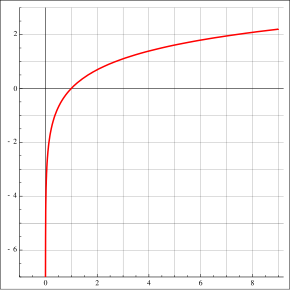  
A reminder of the natural log function

# Evaluate perplexity on the test set

In [ ]:
from nltk.util import bigrams, trigrams
from nltk.lm.preprocessing import pad_both_ends

processed_test = [list(bigrams(pad_both_ends(sent, n=2))) for sent in test]
# processed_test = [list(trigrams(pad_both_ends(sent, n=3))) for sent in test]
print(len(processed_test))
print(processed_test[:3])

In [ ]:
# Evaluate your model's perplexity on the test set, sentence by sentence
for sent in processed_test[:50]:
    print(lm.perplexity(sent))

Lots of `inf` values, what's going on there?

In [ ]:
# FILL IN a random bigram it probably hasn't seen before
bigram_first_word = 'dolphin'
bigram_second_word = 'matters'

lm.counts[[bigram_first_word]][bigram_second_word]

In [ ]:
lm.score(, ['bank'])

In [ ]:
# Check out the calculated probabilities for unigrams and bigrams ("scores")
print(lm.score(bigram_second_word, [bigram_first_word]))
print(lm.logscore(bigram_second_word, [bigram_first_word]))

In [ ]:
lm.perplexity([(bigram_first_word, bigram_second_word)])